# Deep Neural Network (DNNs)
MNIST Dataset Classficiation with DNN

In [0]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [0]:
GPU = torch.cuda.is_available() 
device = torch.device("cuda" if GPU else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용

In [0]:
torch.manual_seed(1)
if device == 'cuda':
    torch.cuda.manual_seed_all(1)

## Load MNIST Dataset

In [0]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [0]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=100,
                         shuffle=True,
                         drop_last=True) # Drop Last Batch

## DNN Model
| Input | 784 |
|--|--|
| Dense | 512 |
| ReLU |  |
| Dense | 512 |
| Output | 10 |

In [0]:
l1 = torch.nn.Linear((28*28), 512).to(device)
l2 = torch.nn.Linear(512, 10).to(device)
relu = torch.nn.ReLU()

model = torch.nn.Sequential(l1, relu, l2)
model

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=10, bias=True)
)

## Train Model

In [0]:
cost = torch.nn.CrossEntropyLoss().to(device) # Built in Softmax Function
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [0]:
epochs = 20
for epoch in range(1, epochs+1):
    avg_cost = 0
    total_batch = len(data_loader)

    for x, y in data_loader:    # batch loop
        x = x.view(-1, 28*28).to(device)
        y = y.to(device)

        optimizer.zero_grad()
        hypothesis = model(x)
        cost_val = cost(hypothesis, y)
        cost_val.backward()
        optimizer.step()

        avg_cost += cost_val
    
    avg_cost /= total_batch

    if epoch % 5 == 1 or epoch == epochs:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, avg_cost.item()))

Epoch    1/20 Cost: 0.503713
Epoch    6/20 Cost: 0.121553
Epoch   11/20 Cost: 0.070358
Epoch   16/20 Cost: 0.047347
Epoch   20/20 Cost: 0.035963


## Evaluate Model

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.977400004863739
Label:  5
Prediction:  5


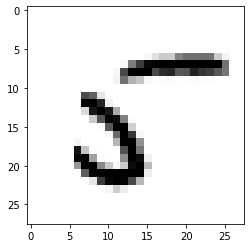

In [0]:
with torch.no_grad(): # Don't Calculate Gradient
    x_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    pred = model(x_test)
    correct_pred = torch.argmax(pred, 1) == y_test
    acc = correct_pred.float().mean()
    print('Accuracy:',acc.item())

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

### Reference
- [PyTorch로 시작하는 딥러닝 입문](https://wikidocs.net/60324)